## A python List is more than just a List 
Let's consider now what happens when we use a Python data structure that holds many Python objects. The standard mutable multi-element container in Python is the list. We can create a list of integers as follows:



In [1]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [2]:
type(L[0])

int

or, similarly, a list strings

In [3]:
L2=[str(i) for i in L]
L2
type(L2[0])

str

Because of Python's dynamic typing, we can even create heterogeneous lists:

In [4]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

But this flexibility comes at a cost: to allow these flexible types, each item in the list must contain its own type info, reference count, and other information–that is, each item is a complete Python object. In the special case that all variables are of the same type, much of this information is redundant: it can be much more efficient to store data in a fixed-type array. The difference between a dynamic-type list and a fixed-type (NumPy-style) array is illustrated in the following figure:
![alt text](array_vs_list.png)



At the implementation level, the array essentially contains a single pointer to one contiguous block of data. The Python list, on the other hand, contains a pointer to a block of pointers, each of which in turn points to a full Python object like the Python integer we saw earlier. Again, the advantage of the list is flexibility: because each list element is a full structure containing both data and type information, the list can be filled with data of any desired type. Fixed-type NumPy-style arrays lack this flexibility, but are much more efficient for storing and manipulating data.

## Fixed-Type Arrays in NumPy
Python offers several different options for storing data in efficient, fixed-type data buffers. The built-in array module (available since Python 3.3) can be used to create dense arrays of a uniform type:

In [6]:
import array
L=list(range(10))
A=array.array('i',L)
A


array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Here 'i' is a type code indicating the contents are integers.

Much more useful, however, is the ndarray object of the NumPy package. While Python's array object provides efficient storage of array-based data, NumPy adds to this efficient operations on that data. We will explore these operations in later sections; here we'll demonstrate several ways of creating a NumPy array.

We'll start with the standard NumPy import, under the alias np:

In [7]:
import numpy as np

## Creating Arrays from Python Lists
First, we can use np.array to create arrays from Python lists:



In [8]:
# integer array:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

Remember that unlike Python lists, NumPy is constrained to arrays that all contain the same type. If types do not match, NumPy will upcast if possible (here, integers are up-cast to floating point):

In [9]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

If we want to explicitly set the data type of the resulting array, we can use the dtype keyword:

In [10]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

Finally, unlike Python lists, NumPy arrays can explicitly be multi-dimensional; here's one way of initializing a multidimensional array using a list of lists:

In [11]:
# nested lists result in multi-dimensional arrays
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

The inner lists are treated as rows of the resulting two-dimensional array.

## Creating Arrays from Scratch
Especially for larger arrays, it is more efficient to create arrays from scratch using routines built into NumPy. Here are several examples:

In [12]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [14]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [15]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function)
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [16]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [17]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1
np.random.random((3, 3))

array([[0.85186142, 0.94029225, 0.74874066],
       [0.19927083, 0.25689882, 0.99754039],
       [0.51651162, 0.45743612, 0.05421981]])

In [18]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[-0.54122721, -0.51555728,  3.6636039 ],
       [ 2.63969402, -2.07461441,  2.22903361],
       [ 0.58899283, -0.17111577,  0.05573697]])

In [19]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))

array([[7, 6, 0],
       [9, 0, 1],
       [5, 6, 4]], dtype=int32)

In [20]:
# Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [21]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that memory location
np.empty(3)

array([1., 1., 1.])

## NumPy Standard Data Types
NumPy arrays contain values of a single type, so it is important to have detailed knowledge of those types and their limitations. Because NumPy is built in C, the types will be familiar to users of C, Fortran, and other related languages.

The standard NumPy data types are listed in the following table. Note that when constructing an array, they can be specified using a string:

In [22]:
np.zeros(10, dtype='int16')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

In [23]:
np.zeros(10, dtype=np.int16)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

| Data type	 | Description |
|-------------|-------------|
| `bool_`     | Boolean (True or False) stored as a byte |
| `int_`      | Default integer type (same as C `long`; normally either `int64` or `int32`)| 
| `intc`      | Identical to C `int` (normally `int32` or `int64`)| 
| `intp`      | Integer used for indexing (same as C `ssize_t`; normally either `int32` or `int64`)| 
| `int8`      | Byte (–128 to 127)| 
| `int16`     | Integer (–32768 to 32767)|
| `int32`     | Integer (–2147483648 to 2147483647)|
| `int64`     | Integer (–9223372036854775808 to 9223372036854775807)| 
| `uint8`     | Unsigned integer (0 to 255)| 
| `uint16`    | Unsigned integer (0 to 65535)| 
| `uint32`    | Unsigned integer (0 to 4294967295)| 
| `uint64`    | Unsigned integer (0 to 18446744073709551615)| 
| `float_`    | Shorthand for `float64`| 
| `float16`   | Half-precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| `float32`   | Single-precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| `float64`   | Double-precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| `complex_`  | Shorthand for `complex128`| 
| `complex64` | Complex number, represented by two 32-bit floats| 
| `complex128`| Complex number, represented by two 64-bit floats| 

## The Basics of NumPy Arrays
### NumPy Array Attributes
First let's discuss some useful array attributes. We'll start by defining three random arrays, a one-dimensional, two-dimensional, and three-dimensional array. We'll use NumPy's random number generator, which we will seed with a set value in order to ensure that the same random arrays are generated each time this code is run:



In [24]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

Each array has attributes ndim (the number of dimensions), shape (the size of each dimension), and size (the total size of the array):

In [25]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


Another useful attribute is the dtype, the data type of the array

In [26]:
print("dtype:", x3.dtype)

dtype: int32


Other attributes include itemsize, which lists the size (in bytes) of each array element, and nbytes, which lists the total size (in bytes) of the array:



In [27]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")


itemsize: 4 bytes
nbytes: 240 bytes


In general, we expect that nbytes is equal to itemsize times size

## Array Indexing: Accessing Single Elements
If you are familiar with Python's standard list indexing, indexing in NumPy will feel quite familiar. In a one-dimensional array, the ith
 value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists:

In [28]:
x1

array([5, 0, 3, 3, 7, 9], dtype=int32)

In [29]:
x1[0]

np.int32(5)

In [30]:
x1[4]

np.int32(7)

To index from the end of the array, you can use negative indices:

In [31]:
x1[-1]

np.int32(9)

In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices:

In [32]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]], dtype=int32)

In [33]:
x2[0, 0]

np.int32(3)

In [34]:
x2[2, 0]

np.int32(1)

Values can also be modified using any of the above index notation:

In [35]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]], dtype=int32)

Keep in mind that, unlike Python lists, NumPy arrays have a fixed type. This means, for example, that if you attempt to insert a floating-point value to an integer array, the value will be silently truncated. Don't be caught unaware by this behavior!

In [36]:
x1[0] = 3.14159  # this will be truncated!
x1


array([3, 0, 3, 3, 7, 9], dtype=int32)

## Array Slicing: Accessing Subarrays
Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the slice notation, marked by the colon (:) character. The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array x, use this:
```
x[start:stop:step]
```
If any of these are unspecified, they default to the values start=0, stop=size of dimension, step=1. We'll take a look at accessing sub-arrays in one dimension and in multiple dimensions.

## One-dimensional subarrays

In [38]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
x[:5]  # first five elements

array([0, 1, 2, 3, 4])

In [40]:
x[5:]  # elements after index 5

array([5, 6, 7, 8, 9])

In [41]:
x[4:7]  # middle three elements

array([4, 5, 6])

In [42]:
x[::2]  # every other element

array([0, 2, 4, 6, 8])

In [43]:
x[1::2]  # every other element, starting at index 1


array([1, 3, 5, 7, 9])

A potentially confusing case is when the step value is negative. In this case, the defaults for start and stop are swapped. This becomes a convenient way to reverse an array:

In [44]:
x[::-1]  # all elements, reversed

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [45]:
x[5::-2]  # reversed every other from index 5


array([5, 3, 1])

## Multi-dimensional subarrays
Multi-dimensional slices work in the same way, with multiple slices separated by commas. For example:

In [46]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]], dtype=int32)

In [47]:
x2[:2, :3]  # two rows, three columns

array([[12,  5,  2],
       [ 7,  6,  8]], dtype=int32)

In [48]:
x2[:3, ::2]  # all rows, every other column

array([[12,  2],
       [ 7,  8],
       [ 1,  7]], dtype=int32)

In [49]:
x2[::-1, ::-1]

array([[ 7,  7,  6,  1],
       [ 8,  8,  6,  7],
       [ 4,  2,  5, 12]], dtype=int32)

## Accessing array rows and columns
One commonly needed routine is accessing of single rows or columns of an array. This can be done by combining indexing and slicing, using an empty slice marked by a single colon (:):

In [50]:
print(x2[:, 0])  # first column of x2

[12  7  1]


In [51]:
print(x2[0, :])  # first row of x2

[12  5  2  4]


In the case of row access, the empty slice can be omitted for a more compact syntax:

In [52]:
print(x2[0])  # equivalent to x2[0, :]

[12  5  2  4]


## Subarrays as no-copy views
One important–and extremely useful–thing to know about array slices is that they return views rather than copies of the array data. This is one area in which NumPy array slicing differs from Python list slicing: in lists, slices will be copies. Consider our two-dimensional array from before:



In [53]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]], dtype=int32)

In [54]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[12  5]
 [ 7  6]]


Now if we modify this subarray, we'll see that the original array is changed! Observe:

In [55]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  5]
 [ 7  6]]


In [56]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


This default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

## Creating copies of arrays
Despite the nice features of array views, it is sometimes useful to instead explicitly copy the data within an array or a subarray. This can be most easily done with the copy() method:

In [57]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)


[[99  5]
 [ 7  6]]


If we now modify this subarray, the original array is not touched:

In [58]:
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

[[42  5]
 [ 7  6]]


In [59]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


## Reshaping of Arrays
Another useful type of operation is reshaping of arrays. The most flexible way of doing this is with the reshape method. For example, if you want to put the numbers 1 through 9 in a 3×3
 grid, you can do the following:

In [60]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Note that for this to work, the size of the initial array must match the size of the reshaped array. Where possible, the reshape method will use a no-copy view of the initial array, but with non-contiguous memory buffers this is not always the case.

Another common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix. This can be done with the reshape method, or more easily done by making use of the newaxis keyword within a slice operation:

In [61]:
x = np.array([1, 2, 3])

# row vector via reshape
x.reshape((1, 3))


array([[1, 2, 3]])

In [62]:
# row vector via newaxis
x[np.newaxis, :]

array([[1, 2, 3]])

In [63]:
# column vector via reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [64]:
# column vector via newaxis
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

We will see this type of transformation often throughout the remainder of the book.

## Array Concatenation and Splitting
All of the preceding routines worked on single arrays. It's also possible to combine multiple arrays into one, and to conversely split a single array into multiple arrays. We'll take a look at those operations here.

## Concatenation of arrays
Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines np.concatenate, np.vstack, and np.hstack. np.concatenate takes a tuple or list of arrays as its first argument, as we can see here:

In [65]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

You can also concatenate more than two arrays at once:

In [66]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


It can also be used for two-dimensional arrays:

In [67]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [68]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [69]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

For working with arrays of mixed dimensions, it can be clearer to use the np.vstack (vertical stack) and np.hstack (horizontal stack) functions:

In [70]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [71]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

Similary, np.dstack will stack arrays along the third axis.

## Splitting of arrays
The opposite of concatenation is splitting, which is implemented by the functions np.split, np.hsplit, and np.vsplit. For each of these, we can pass a list of indices giving the split points:

In [72]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)


[1 2 3] [99 99] [3 2 1]


Notice that N split-points, leads to N + 1 subarrays. The related functions np.hsplit and np.vsplit are similar:

In [73]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [74]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [75]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


Similarly, np.dsplit will split arrays along the third axis.

## Computation on NumPy Arrays: Universal Functions
Computation on NumPy arrays can be very fast, or it can be very slow. The key to making it fast is to use vectorized operations, generally implemented through NumPy's universal functions (ufuncs). This section motivates the need for NumPy's ufuncs, which can be used to make repeated calculations on array elements much more efficient. It then introduces many of the most common and useful arithmetic ufuncs available in the NumPy package.

### The Slowness of Loops
Python's default implementation (known as CPython) does some operations very slowly. This is in part due to the dynamic, interpreted nature of the language: the fact that types are flexible, so that sequences of operations cannot be compiled down to efficient machine code as in languages like C and Fortran. Recently there have been various attempts to address this weakness: well-known examples are the PyPy project, a just-in-time compiled implementation of Python; the Cython project, which converts Python code to compilable C code; and the Numba project, which converts snippets of Python code to fast LLVM bytecode. Each of these has its strengths and weaknesses, but it is safe to say that none of the three approaches has yet surpassed the reach and popularity of the standard CPython engine.

The relative sluggishness of Python generally manifests itself in situations where many small operations are being repeated – for instance looping over arrays to operate on each element. For example, imagine we have an array of values and we'd like to compute the reciprocal of each. A straightforward approach might look like this:

In [76]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

This implementation probably feels fairly natural to someone from, say, a C or Java background. But if we measure the execution time of this code for a large input, we see that this operation is very slow, perhaps surprisingly so! We'll benchmark this with IPython's %timeit magic (discussed in Profiling and Timing Code):

In [77]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

1.94 s ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It takes several seconds to compute these million operations and to store the result! When even cell phones have processing speeds measured in Giga-FLOPS (i.e., billions of numerical operations per second), this seems almost absurdly slow. It turns out that the bottleneck here is not the operations themselves, but the type-checking and function dispatches that CPython must do at each cycle of the loop. Each time the reciprocal is computed, Python first examines the object's type and does a dynamic lookup of the correct function to use for that type. If we were working in compiled code instead, this type specification would be known before the code executes and the result could be computed much more efficiently.

## Introducing UFuncs
For many types of operations, NumPy provides a convenient interface into just this kind of statically typed, compiled routine. This is known as a vectorized operation. This can be accomplished by simply performing an operation on the array, which will then be applied to each element. This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

Compare the results of the following two:

In [78]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


Looking at the execution time for our big array, we see that it completes orders of magnitude faster than the Python loop:

In [79]:
%timeit (1.0 / big_array)

3.93 ms ± 291 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Vectorized operations in NumPy are implemented via ufuncs, whose main purpose is to quickly execute repeated operations on values in NumPy arrays. Ufuncs are extremely flexible – before we saw an operation between a scalar and an array, but we can also operate between two arrays:

In [80]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

And ufunc operations are not limited to one-dimensional arrays–they can also act on multi-dimensional arrays as well:

In [81]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

Computations using vectorization through ufuncs are nearly always more efficient than their counterpart implemented using Python loops, especially as the arrays grow in size. Any time you see such a loop in a Python script, you should consider whether it can be replaced with a vectorized expression.

## Exploring NumPy's UFuncs
Ufuncs exist in two flavors: unary ufuncs, which operate on a single input, and binary ufuncs, which operate on two inputs. We'll see examples of both these types of functions here.

## Array arithmetic
NumPy's ufuncs feel very natural to use because they make use of Python's native arithmetic operators. The standard addition, subtraction, multiplication, and division can all be used:

In [82]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


There is also a unary ufunc for negation, and a ** operator for exponentiation, and a % operator for modulus:

In [83]:
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)


-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


In addition, these can be strung together however you wish, and the standard order of operations is respected:

In [84]:
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

Each of these arithmetic operations are simply convenient wrappers around specific functions built into NumPy; for example, the + operator is a wrapper for the add function:

In [85]:
np.add(x, 2)

array([2, 3, 4, 5])

The following table lists the arithmetic operators implemented in NumPy:

| Operator    | Equivalent ufunc  | Description                         |
|-------------|-------------------|-------------------------------------|
|`+`          |`np.add`           |Addition (e.g., `1 + 1 = 2`)         |
|`-`          |`np.subtract`      |Subtraction (e.g., `3 - 2 = 1`)      |
|`-`          |`np.negative`      |Unary negation (e.g., `-2`)          |
|`*`          |`np.multiply`      |Multiplication (e.g., `2 * 3 = 6`)   |
|`/`          |`np.divide`        |Division (e.g., `3 / 2 = 1.5`)       |
|`//`         |`np.floor_divide`  |Floor division (e.g., `3 // 2 = 1`)  |
|`**`         |`np.power`         |Exponentiation (e.g., `2 ** 3 = 8`)  |
|`%`          |`np.mod`           |Modulus/remainder (e.g., `9 % 4 = 1`)|

Additionally, there are Boolean/bitwise operators; we will explore these in [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb).

## Absolute value
Just as NumPy understands Python's built-in arithmetic operators, it also understands Python's built-in absolute value function:

In [86]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

The corresponding NumPy ufunc is np.absolute, which is also available under the alias np.abs:

In [87]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [88]:
np.abs(x)

array([2, 1, 0, 1, 2])

This ufunc can also handle complex data, in which the absolute value returns the magnitude:

In [89]:
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(x)

array([5., 5., 2., 1.])

## Trigonometric functions
NumPy provides a large number of useful ufuncs, and some of the most useful for the data scientist are the trigonometric functions. We'll start by defining an array of angles:

In [90]:
theta = np.linspace(0, np.pi, 3)

Now we can compute some trigonometric functions on these values:

In [91]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


The values are computed to within machine precision, which is why values that should be zero do not always hit exactly zero. Inverse trigonometric functions are also available:

In [92]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


## Exponents and logarithms
Another common type of operation available in a NumPy ufunc are the exponentials:

In [93]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


The inverse of the exponentials, the logarithms, are also available. The basic np.log gives the natural logarithm; if you prefer to compute the base-2 logarithm or the base-10 logarithm, these are available as well:

In [94]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


In [95]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


When x is very small, these functions give more precise values than if the raw np.log or np.exp were to be used.

## Specialized ufuncs
NumPy has many more ufuncs available, including hyperbolic trig functions, bitwise arithmetic, comparison operators, conversions from radians to degrees, rounding and remainders, and much more. A look through the NumPy documentation reveals a lot of interesting functionality.

Another excellent source for more specialized and obscure ufuncs is the submodule scipy.special. If you want to compute some obscure mathematical function on your data, chances are it is implemented in scipy.special. There are far too many functions to list them all, but the following snippet shows a couple that might come up in a statistics context:

In [96]:
from scipy import special

In [97]:
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


In [98]:
# Error function (integral of Gaussian)
# its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)  =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

erf(x)  = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


There are many, many more ufuncs available in both NumPy and scipy.special. Because the documentation of these packages is available online, a web search along the lines of "gamma function python" will generally find the relevant information.

## Advanced Ufunc Features¶

Many NumPy users make use of ufuncs without ever learning their full set of features. We'll outline a few specialized features of ufuncs here.

## Specifying output
For large calculations, it is sometimes useful to be able to specify the array where the result of the calculation will be stored. Rather than creating a temporary array, this can be used to write computation results directly to the memory location where you'd like them to be. For all ufuncs, this can be done using the out argument of the function:

In [99]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


This can even be used with array views. For example, we can write the results of a computation to every other element of a specified array:

In [101]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


If we had instead written y[::2] = 2 ** x, this would have resulted in the creation of a temporary array to hold the results of 2 ** x, followed by a second operation copying those values into the y array. This doesn't make much of a difference for such a small computation, but for very large arrays the memory savings from careful use of the out argument can be significant.

## Aggregates
For binary ufuncs, there are some interesting aggregates that can be computed directly from the object. For example, if we'd like to reduce an array with a particular operation, we can use the reduce method of any ufunc. A reduce repeatedly applies a given operation to the elements of an array until only a single result remains.

For example, calling reduce on the add ufunc returns the sum of all elements in the array:

In [102]:
x = np.arange(1, 6)
np.add.reduce(x)

np.int64(15)

Similarly, calling reduce on the multiply ufunc results in the product of all array elements:

In [103]:
np.multiply.reduce(x)

np.int64(120)

If we'd like to store all the intermediate results of the computation, we can instead use accumulate:

In [104]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [105]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

## Outer products
Finally, any ufunc can compute the output of all pairs of two different inputs using the outer method. This allows you, in one line, to do things like create a multiplication table:

In [106]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

## Aggregations: Min, Max, and Everything In Between
### Summing the Values in an Array
As a quick example, consider computing the sum of all values in an array. Python itself can do this using the built-in sum function:



In [107]:
import numpy as np

In [108]:
L = np.random.random(100)
sum(L)

np.float64(50.461758453195614)

The syntax is quite similar to that of NumPy's sum function, and the result is the same in the simplest case:

In [109]:
np.sum(L)

np.float64(50.46175845319564)

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [110]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

75.4 ms ± 3.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.35 ms ± 498 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Be careful, though: the sum function and the np.sum function are not identical, which can sometimes lead to confusion! In particular, their optional arguments have different meanings, and np.sum is aware of multiple array dimensions, as we will see in the following section.

## Minimum and Maximum
Similarly, Python has built-in min and max functions, used to find the minimum value and maximum value of any given array:

In [111]:
min(big_array), max(big_array)

(np.float64(7.071203171893359e-07), np.float64(0.9999997207656334))

In [112]:
np.min(big_array), np.max(big_array)

(np.float64(7.071203171893359e-07), np.float64(0.9999997207656334))

In [113]:
%timeit min(big_array)
%timeit np.min(big_array)

50.9 ms ± 2.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
508 μs ± 50 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


For min, max, sum, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [114]:
print(big_array.min(), big_array.max(), big_array.sum())

7.071203171893359e-07 0.9999997207656334 500216.80348100053


## Multi dimensional aggregates
One common type of aggregation operation is an aggregate along a row or column. Say you have some data stored in a two-dimensional array:

In [115]:
M = np.random.random((3, 4))
print(M)

[[0.79832448 0.44923861 0.95274259 0.03193135]
 [0.18441813 0.71417358 0.76371195 0.11957117]
 [0.37578601 0.11936151 0.37497044 0.22944653]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [116]:
M.sum()

np.float64(5.1136763453287335)

Aggregation functions take an additional argument specifying the axis along which the aggregate is computed. For example, we can find the minimum value within each column by specifying axis=0:

In [117]:
M.min(axis=0)

array([0.18441813, 0.11936151, 0.37497044, 0.03193135])

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [118]:
M.max(axis=1)

array([0.95274259, 0.76371195, 0.37578601])

The way the axis is specified here can be confusing to users coming from other languages. The axis keyword specifies the dimension of the array that will be collapsed, rather than the dimension that will be returned. So specifying axis=0 means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

### Other Aggregation Functions

NumPy provides several other aggregation functions with a similar API, and additionally most have a `NaN`-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point `NaN` value (see [Handling Missing Data](03.04-Missing-Values.ipynb)).

The following table provides a list of useful aggregation functions available in NumPy:

|Function name    |   NaN-safe version| Description                                   |
|-----------------|-------------------|-----------------------------------------------|
| `np.sum`        | `np.nansum`       | Compute sum of elements                       |
| `np.prod`       | `np.nanprod`      | Compute product of elements                   |
| `np.mean`       | `np.nanmean`      | Compute mean of elements                      |
| `np.std`        | `np.nanstd`       | Compute standard deviation                    |
| `np.var`        | `np.nanvar`       | Compute variance                              |
| `np.min`        | `np.nanmin`       | Find minimum value                            |
| `np.max`        | `np.nanmax`       | Find maximum value                            |
| `np.argmin`     | `np.nanargmin`    | Find index of minimum value                   |
| `np.argmax`     | `np.nanargmax`    | Find index of maximum value                   |
| `np.median`     | `np.nanmedian`    | Compute median of elements                    |
| `np.percentile` | `np.nanpercentile`| Compute rank-based statistics of elements     |
| `np.any`        | N/A               | Evaluate whether any elements are true        |
| `np.all`        | N/A               | Evaluate whether all elements are true        |

You will see these aggregates often throughout the rest of the book.

## Example: What is the Average Height of US Presidents?¶
Aggregates available in NumPy can be extremely useful for summarizing a set of values. As a simple example, let's consider the heights of all US presidents. This data is available in the file president_heights.csv, which is a simple comma-separated list of labels and values:

In [120]:
import pandas as pd
data = pd.read_csv('president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Now that we have this data array, we can compute a variety of summary statistics:

In [121]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values. We may also wish to compute quantiles:

In [122]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


We see that the median height of US presidents is 182 cm, or just shy of six feet.



In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

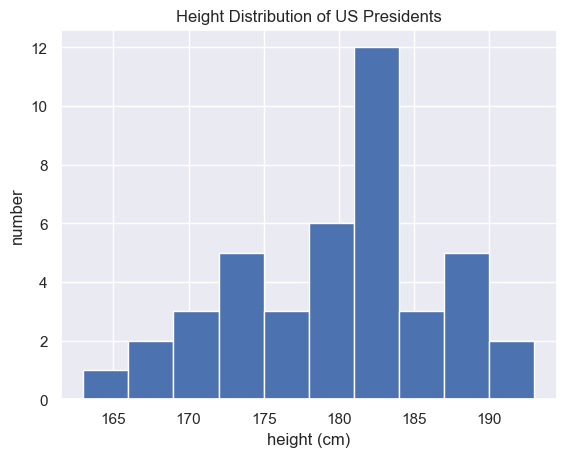

In [124]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');